In [1]:
from pyoculus.problems import AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [4]:
### Creating the pyoculus problem object
print("\nCreating the pyoculus problem object\n")

separatrix = {"type": "circular-current-loop", "amplitude": -10, "R": 6, "Z": -5.5}
maxwellboltzmann = {"m": 6, "n": -1, "d": np.sqrt(2), "type": "maxwell-boltzmann", "amplitude": 1e-3, "A":1, "B":8}

# Creating the pyoculus problem object, adding the perturbation here use the R, Z provided as center point
pyoproblem = AnalyticCylindricalBfield.without_axis(
    6,
    0,
    0.91,
    0.6,
    perturbations_args=[separatrix],
    Rbegin=1,
    Rend=8,
    niter=800,
    guess=[6.41, -0.7],
    tol=1e-9,
)

# # Adding perturbation after the object is created uses the found axis as center point
pyoproblem.add_perturbation(maxwellboltzmann)


Creating the pyoculus problem object

0 - dr : 0.010422282084043258
1 - RZ : [ 6.41409394 -0.69368043]
1 - dr : 6.293042617255254e-06
2 - RZ : [ 6.41409781 -0.69367863]
2 - dr : 9.776471937205409e-12
0 - dr : 9.776471937205409e-12


(<Figure size 2000x500 with 2 Axes>, <Axes: >)

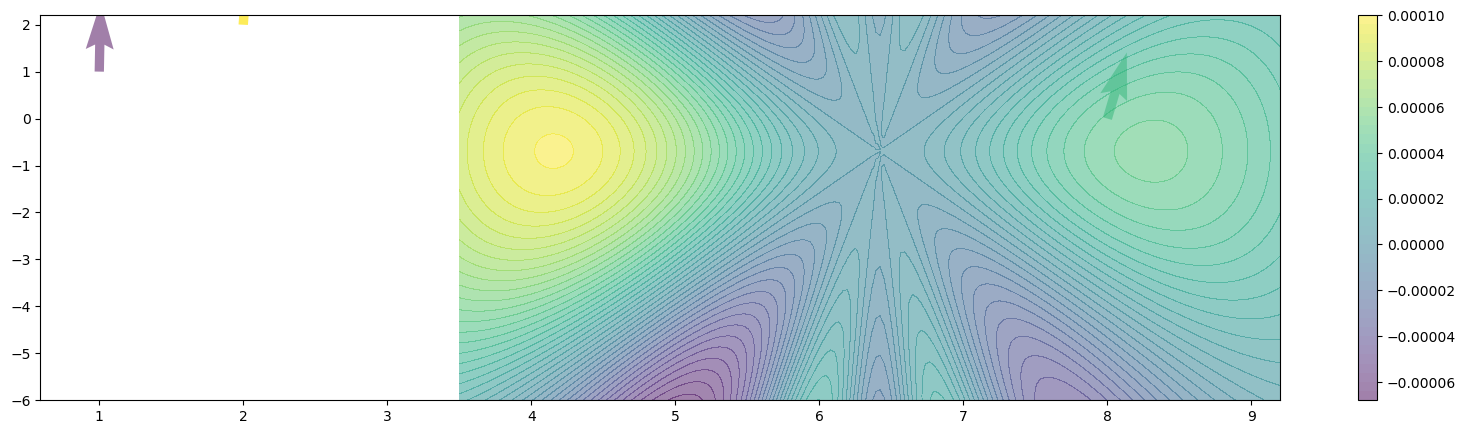

In [5]:
RZ_manifold = np.array([[8.,0.],[1.,1.], [2.,2.], [2.,2.]])
pyoproblem.plot_intensities([3.5, 9.2], [-6, 2.2], [200, 200], RZ_manifold)

In [ ]:
psi_gaussian([6.,0.,0.], 6, 0., 1.41, 3, 1)

In [ ]:
psitob(psi_gaussian)([8.,0.,0.], 6., 0., 1.41, 3, 1)

In [ ]:
pt1 = manifold.integrate([6.33, -4.], 5, 1)
ax.scatter(pt1[0,:], pt1[1,:], marker="p", edgecolors="black", color="yellow", zorder=10)

fig

In [ ]:
pert_maxwellboltzmann([6.,0.,0.], 6., 0., 1.41, 3, 1)

In [ ]:
RZ_manifold = np.array([[8.,0.],[1.,1.], [2.,2.], [2.,2.]])
Bs = np.array([pyoproblem.B_perturbation([R, 0.0, Z]) for R, Z in RZ_manifold])

In [ ]:
R, Z = np.meshgrid(np.linspace(3.5, 9, 5), np.linspace(-6, 2, 5))

In [ ]:
RZ_manifold = np.array([R.flatten(), Z.flatten()]).T

In [ ]:
fig, ax = pyoproblem.plot_intensities(rw=[3.5, 9.2], zw=[-6, 2.2], nl=[50, 50], RZ_manifold = RZ_manifold, N_levels=50, alpha = 0.5)
ax.scatter(pyoproblem._R0, pyoproblem._Z0, c='r', s=10)

In [ ]:
### Finding the X-point
print("\nFinding the X-point\n")

# set up the integrator for the FixedPoint
iparams = dict()
iparams["rtol"] = 1e-12

pparams = dict()
pparams["nrestart"] = 0
pparams["niter"] = 300

# set up the FixedPoint object
fixedpoint = FixedPoint(pyoproblem, pparams, integrator_params=iparams)

# find the X-point
# guess = [6.18, -4.49]
guess = [6.21560891, -4.46981856]
print(f"Initial guess: {guess}")

fixedpoint.compute(guess=guess, pp=0, qq=1, sbegin=4, send=9, tol=1e-10)

if fixedpoint.successful:
    results = [list(p) for p in zip(fixedpoint.x, fixedpoint.y, fixedpoint.z)]
else:
    print("FixedPoint did not converge - don't continue")

In [ ]:
fig = pickle.load(open("../../runs/toybox-tok-1704/perturbed-6-3/homoclinics_04221448.pkl", "rb"))
ax = fig.gca()
ax.set_xlim(3.5, 9.2)

In [ ]:
iparams = dict()
iparams["rtol"] = 1e-12

manifold = Manifold(fixedpoint, pyoproblem, integrator_params=iparams)

In [ ]:
pt1 = manifold.integrate([6.542, -4.024], 5, 1)
pt2 = manifold.integrate([7.3, -3.45], 5, 1)
ax.scatter(pt1[0,:], pt1[1,:], marker="p", edgecolors="black", color="yellow", zorder=10)
ax.scatter(pt2[0,:], pt2[1,:], marker="d", edgecolors="black", color="yellow", zorder=10)

fig

In [ ]:
pt1 = manifold.integrate([6.33, -4.], 5, 1)
ax.scatter(pt1[0,:], pt1[1,:], marker="p", edgecolors="black", color="yellow", zorder=10)

fig

In [ ]:
pt1 = manifold.integrate([6.436, -4.], 5, 1)
pt2 = manifold.integrate([6.79, -3.782], 5, 1)
pt3 = manifold.integrate([7.417, -3.444], 5, 1)
ax.scatter(pt1[0,:], pt1[1,:], marker="p", edgecolors="black", color="yellow", zorder=10)
ax.scatter(pt2[0,:], pt2[1,:], marker="d", edgecolors="black", color="yellow", zorder=10)
ax.scatter(pt3[0,:], pt3[1,:], marker="s", edgecolors="black", color="yellow", zorder=10)

fig

In [ ]:
ax.set_xlim(6, 8)
ax.set_ylim(-6, -2)
fig

In [ ]:
pickle.dump(fig, open("../../runs/toybox-tok-1704/perturbed-6-3/following_point.pkl", "wb"))

In [ ]:
fig.savefig("../../runs/toybox-tok-1704/perturbed-6-3/following_point.pdf", dpi=800)

In [ ]:
manifold.choose()

In [ ]:
hs = manifold.integrate(manifold.rfp_s + 1e-6 * manifold.vector_s, 7, -1)
hu = manifold.integrate(manifold.rfp_u + 1e-6 * manifold.vector_u, 6, 1)

ax.scatter(hs[0,:], hs[1,:], marker="x", color="purple", zorder=10)
ax.scatter(hu[0,:], hu[1,:], marker="+", color="blue", zorder=10)

fig

In [ ]:
eps_s_1, eps_u_1 = find_homoclinic(manifold, 1e-6, 1e-6, n_s = 7, n_u = 6)

In [ ]:
guess_2 = [eps_s_1*np.power(manifold.lambda_s, 1/4), eps_u_1*np.power(manifold.lambda_u, 1/4)]    
print(f"Initial guess: {guess_2}")   

In [ ]:
hs = manifold.integrate(manifold.rfp_s + guess_2[0] * manifold.vector_s, 7, -1)
hu = manifold.integrate(manifold.rfp_u + guess_2[1] * manifold.vector_u, 6, 1)

ax.scatter(hs[0,:], hs[1,:], marker="x", color="purple", zorder=10)
ax.scatter(hu[0,:], hu[1,:], marker="+", color="blue", zorder=10)

fig

In [ ]:
eps_s_2, eps_u_2 = find_homoclinic(manifold, guess_2[0], guess_2[1], n_s = 7, n_u = 6)

In [ ]:
guess_3 = [eps_s_1*np.power(manifold.lambda_s, 2/4), eps_u_1*np.power(manifold.lambda_u, 2/4)]     
print(f"Initial guess: {guess_3}")   

In [ ]:
hs = manifold.integrate(manifold.rfp_s + guess_3[0] * manifold.vector_s, 7, -1)
hu = manifold.integrate(manifold.rfp_u + guess_3[1] * manifold.vector_u, 6, 1)

ax.scatter(hs[0,:], hs[1,:], marker="x", color="purple", zorder=10)
ax.scatter(hu[0,:], hu[1,:], marker="+", color="blue", zorder=10)

# ax.set_xlim(5.27, 5.3)
# ax.set_ylim(1.85, 2)

fig

In [ ]:
eps_s_3, eps_u_3 = find_homoclinic(manifold, guess_3[0], guess_3[1], n_s = 7, n_u = 6) 

In [ ]:
guess_4 = [eps_s_1*np.power(manifold.lambda_s, 3/4), eps_u_1*np.power(manifold.lambda_u, 3/4)]     
print(f"Initial guess: {guess_4}") 

In [ ]:
hs = manifold.integrate(manifold.rfp_s + guess_4[0] * manifold.vector_s, 7, -1)
hu = manifold.integrate(manifold.rfp_u + guess_4[1] * manifold.vector_u, 6, 1)

ax.scatter(hs[0,:], hs[1,:], marker="x", color="purple", zorder=10)
ax.scatter(hu[0,:], hu[1,:], marker="+", color="blue", zorder=10)

fig

In [ ]:
eps_s_4, eps_u_4 = find_homoclinic(manifold, guess_4[0], guess_4[1], n_s = 7, n_u = 6)

In [ ]:
hs_1 = manifold.integrate(manifold.rfp_s + eps_s_1 * manifold.vector_s, 7, -1)
hs_2 = manifold.integrate(manifold.rfp_s + eps_s_2 * manifold.vector_s, 7, -1)
hs_3 = manifold.integrate(manifold.rfp_s + eps_s_3 * manifold.vector_s, 7, -1)
hs_4 = manifold.integrate(manifold.rfp_s + eps_s_4 * manifold.vector_s, 7, -1)

hu_1 = manifold.integrate(manifold.rfp_u + eps_u_1 * manifold.vector_u, 6, 1)
hu_2 = manifold.integrate(manifold.rfp_u + eps_u_2 * manifold.vector_u, 6, 1)
hu_3 = manifold.integrate(manifold.rfp_u + eps_u_3 * manifold.vector_u, 6, 1)
hu_4 = manifold.integrate(manifold.rfp_u + eps_u_4 * manifold.vector_u, 6, 1)

ax.scatter(hs_1[0,:], hs_1[1,:], marker="x", color="purple", zorder=10)
ax.scatter(hs_2[0,:], hs_2[1,:], marker="+", color="purple", zorder=10)
ax.scatter(hs_3[0,:], hs_3[1,:], marker="o", color="purple", zorder=10)
ax.scatter(hs_4[0,:], hs_4[1,:], marker="s", color="purple", zorder=10)

ax.scatter(hu_1[0,:], hu_1[1,:], marker="x", color="blue", zorder=10)
ax.scatter(hu_2[0,:], hu_2[1,:], marker="+", color="blue", zorder=10)
ax.scatter(hu_3[0,:], hu_3[1,:], marker="o", color="blue", zorder=10)
ax.scatter(hu_4[0,:], hu_4[1,:], marker="s", color="blue", zorder=10)

fig

In [ ]:
print("\nComputing the manifold\n")
manifold.compute(nintersect = 9, neps = 300, epsilon=1e-7)
# manifold.compute(nintersect = 9, neps = 100, epsilon=1e-6, directions="s+")
# manifold.compute(nintersect = 7, neps = 1, epsilon=1e-7, directions="u+")
# manifold.compute(nintersect = 7, neps = 1, epsilon=1e-6, directions="s+")

In [ ]:
print("\nPlotting the manifold")
manifold.plot(directions="u+s+")
# manifold.plot(ax, directions="u+s+")
# ax.set_title(f"amplitude = {maxwellboltzmann['amplitude']}, m = {maxwellboltzmann['m']}, n = {maxwellboltzmann['n']}, d = {maxwellboltzmann['d']:.2f}")

In [ ]:
# ax.set_xlim(5.6, 7.5)
# ax.set_ylim(-6, -3)

ax.set_xlim(6, 6.7)
ax.set_ylim(-4.6, -4)

fig